In [1]:
import pandas as pd
from IPython.display import display, Markdown

markdown_text = """
### Kuvaileva analyysi
Tässä osiossa tutkimme datasetin perusominaisuuksia, kuten keskiarvoa, mediaania ja puuttuvia arvoja. Tämä auttaa ymmärtämään datan rakennetta ja mahdollisia poikkeamia tai puuttuvia tietoja, jotka voivat vaikuttaa analyysiin ja mallinnukseen.
"""

# Näytä markdown-teksti
display(Markdown(markdown_text))

# Lataa datasetti
file_path = '../data/house_data_test.csv'
house_data = pd.read_csv(file_path)

# Kuvaileva analyysi
summary = house_data.describe()
print("Datasetin kuvailevat tilastot:\n", summary)

# Tarkista puuttuvat arvot
missing_values = house_data.isnull().sum()
print("\nPuuttuvat arvot sarakkeittain:\n", missing_values)



### Kuvaileva analyysi
Tässä osiossa tutkimme datasetin perusominaisuuksia, kuten keskiarvoa, mediaania ja puuttuvia arvoja. Tämä auttaa ymmärtämään datan rakennetta ja mahdollisia poikkeamia tai puuttuvia tietoja, jotka voivat vaikuttaa analyysiin ja mallinnukseen.


Datasetin kuvailevat tilastot:
               price     bedrooms        grade  living_in_m2  real_bathrooms  \
count  6.700000e+03  6700.000000  6700.000000   6700.000000     6700.000000   
mean   4.754123e+05     2.240448     2.517612    181.433791        1.665075   
std    2.080475e+05     0.692618     0.971218     68.315420        0.627102   
min    7.500000e+04     1.000000     1.000000     49.238590        1.000000   
25%    3.150000e+05     2.000000     2.000000    129.135170        1.000000   
50%    4.350000e+05     2.000000     2.000000    172.799580        2.000000   
75%    6.021250e+05     3.000000     3.000000    225.754290        2.000000   
max    1.155000e+06     3.000000     5.000000    391.121630        3.000000   

            month  quartile_zone  
count  6700.00000    6700.000000  
mean      6.57194       2.424179  
std       3.09930       1.070753  
min       1.00000       1.000000  
25%       4.00000       2.000000  
50%       6.00000       2.000000  
75%       9


### Ominaisuuksien analysointi ja visualisointi
Seuraavaksi visualisoimme hintojen jakaumaa, hintojen ja asuinpinta-alan välistä suhdetta sekä ominaisuuksien välisiä korrelaatioita. Nämä visualisoinnit antavat käsityksen siitä, mitkä muuttujat ovat keskeisimpiä asunnon hintojen kannalta.


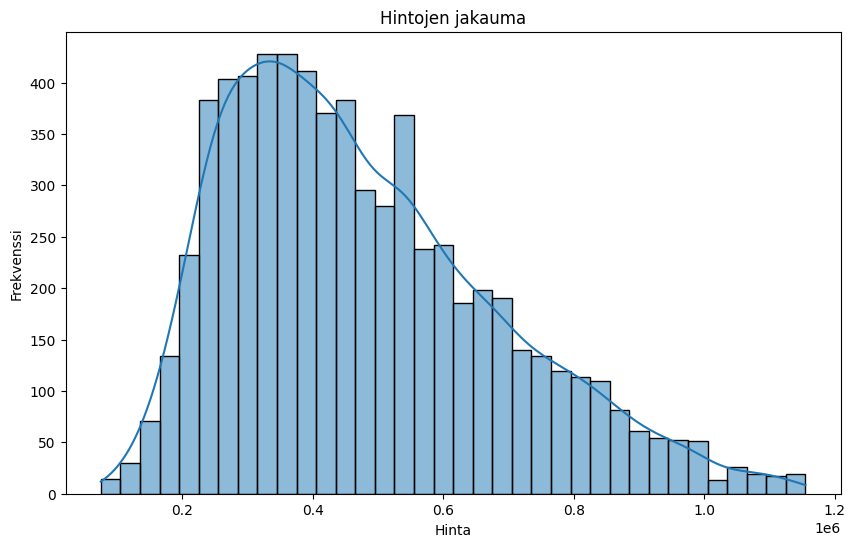

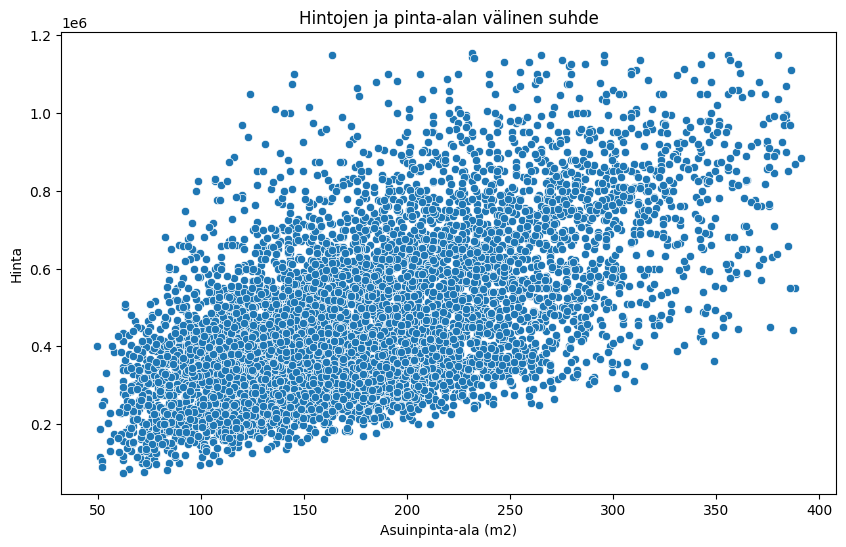

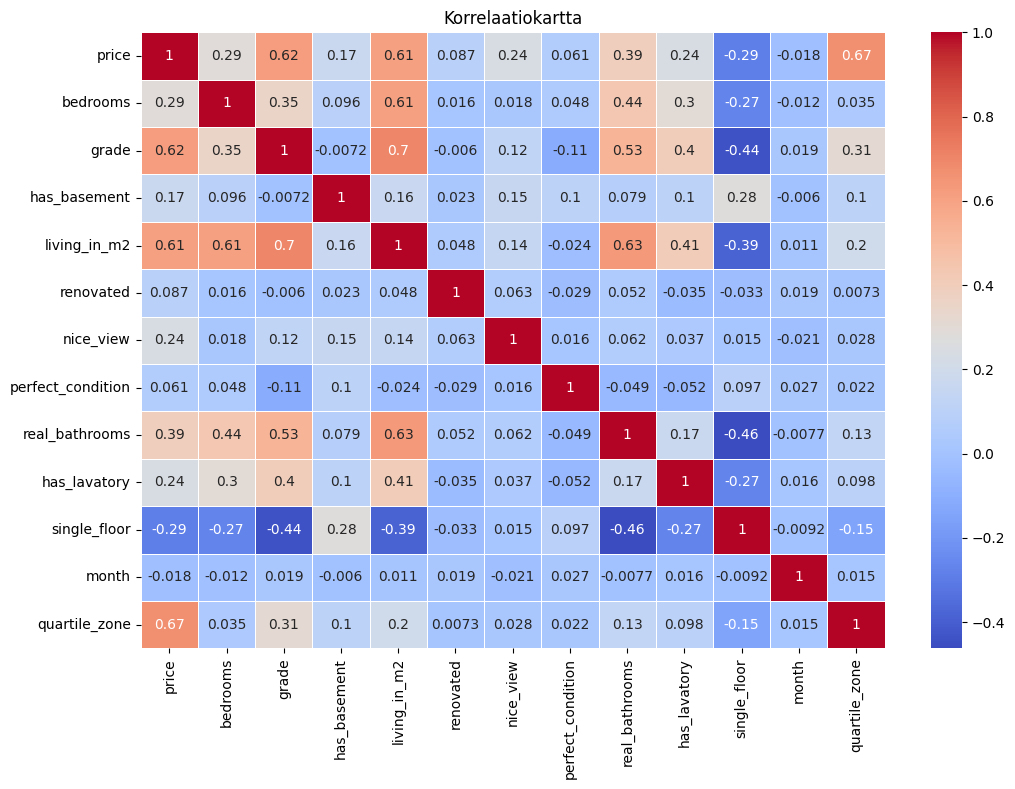

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

markdown_text = """
### Ominaisuuksien analysointi ja visualisointi
Seuraavaksi visualisoimme hintojen jakaumaa, hintojen ja asuinpinta-alan välistä suhdetta sekä ominaisuuksien välisiä korrelaatioita. Nämä visualisoinnit antavat käsityksen siitä, mitkä muuttujat ovat keskeisimpiä asunnon hintojen kannalta.
"""

# Näytä markdown-teksti
display(Markdown(markdown_text))

# Hintojen jakauma
plt.figure(figsize=(10, 6))
sns.histplot(house_data['price'], kde=True)
plt.title("Hintojen jakauma")
plt.xlabel("Hinta")
plt.ylabel("Frekvenssi")
plt.show()

# Hintojen ja pinta-alan välinen suhde
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_data, x='living_in_m2', y='price')
plt.title("Hintojen ja pinta-alan välinen suhde")
plt.xlabel("Asuinpinta-ala (m2)")
plt.ylabel("Hinta")
plt.show()

# Korrelaatiokartta
plt.figure(figsize=(12, 8))
corr_matrix = house_data.drop(columns=['date']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korrelaatiokartta")
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

markdown_text = """
### Mallin rakentaminen ja validointi
Tässä osiossa rakennamme lineaarisen regressiomallin ennustamaan asuntojen hintoja. Mallia koulutetaan ja testataan, ja mallin suorituskykyä arvioidaan MAE (Mean Absolute Error) ja RMSE (Root Mean Squared Error) -mittareilla, jotta voidaan arvioida ennustetarkkuutta.
"""

# Näytä markdown-teksti
display(Markdown(markdown_text))

# Aseta pandas-optio, joka estää downcasting-varoituksen
pd.set_option('future.no_silent_downcasting', True)

# Ominaisuuksien valinta ja kohdemuuttuja
X = house_data.drop(columns=['price', 'date'])
X = X.replace({True: 1, False: 0})  # Koodaa boolean-arvot numeeriseksi

y = house_data['price']

# Datan jako koulutus- ja testijoukkoon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineaarisen regressiomallin rakentaminen
model = LinearRegression()
model.fit(X_train, y_train)

# Ennusteiden tarkastelu
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


### Mallin rakentaminen ja validointi
Tässä osiossa rakennamme lineaarisen regressiomallin ennustamaan asuntojen hintoja. Mallia koulutetaan ja testataan, ja mallin suorituskykyä arvioidaan MAE (Mean Absolute Error) ja RMSE (Root Mean Squared Error) -mittareilla, jotta voidaan arvioida ennustetarkkuutta.


Mean Absolute Error (MAE): 78523.1981922916
Root Mean Squared Error (RMSE): 104279.54744515865



### Ominaisuuksien vaikutuksen visualisointi
Visualisoimme kunkin ominaisuuden vaikutuksen ennustettuun hintaan lineaarisessa regressiomallissa. Tämä antaa käsityksen siitä, kuinka eri tekijät vaikuttavat asunnon hintaan, ja auttaa tulkitsemaan mallin tuloksia.


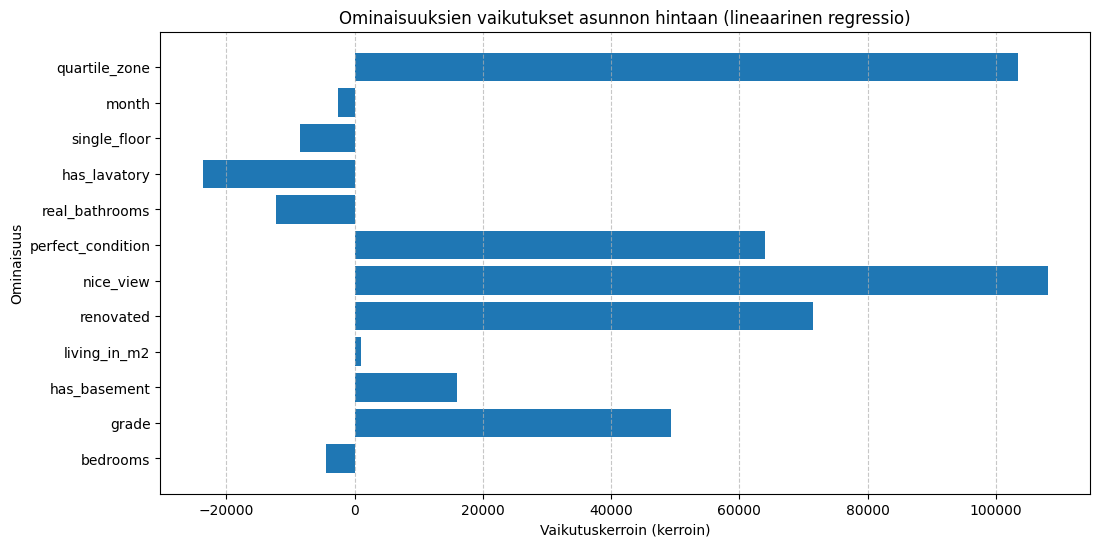

In [4]:
markdown_text = """
### Ominaisuuksien vaikutuksen visualisointi
Visualisoimme kunkin ominaisuuden vaikutuksen ennustettuun hintaan lineaarisessa regressiomallissa. Tämä antaa käsityksen siitä, kuinka eri tekijät vaikuttavat asunnon hintaan, ja auttaa tulkitsemaan mallin tuloksia.
"""

# Näytä markdown-teksti
display(Markdown(markdown_text))

# Ominaisuuksien vaikutuksen tarkastelu lineaarisessa regressiomallissa
coefficients = model.coef_
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.barh(feature_names, coefficients)
plt.xlabel("Vaikutuskerroin (kerroin)")
plt.ylabel("Ominaisuus")
plt.title("Ominaisuuksien vaikutukset asunnon hintaan (lineaarinen regressio)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()